In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Q4

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
#looking at top five
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [4]:
#looking at bottom 5
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


# Q5

In [5]:
# identifying rows, columns and data types
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


# ANSWER: 7662 rows, 4 columns; 0=object, 1=int64, 3&4=float64

# Q6

In [6]:
#dropping in first line, renaming in second
gdp_df = gdp_df.drop('Value Footnotes', axis=1)
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [7]:
#view the head to verify
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


# Q7

In [85]:
gdp_df.nunique()

Country            242
Year                33
GDP_Per_Capita    7624
dtype: int64

In [95]:
#reset_index to give a name to the column so I can count those values in the following line
count_df = gdp_df['Country'].value_counts().reset_index()

In [94]:
count_df[count_df['count']==33].count()

Country    202
count      202
dtype: int64

In [92]:
count_df[count_df['count']<33].count()

Country    40
count      40
dtype: int64

# 202 countries have data for all years, while 40 countries are missing at least 5 years of data and the observations per year have been increasing over time.

# Q8

In [12]:
#isin() enables selecting by condition
Q8a = gdp_df[gdp_df['Year'].isin([2020])]

In [13]:
Q8a

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


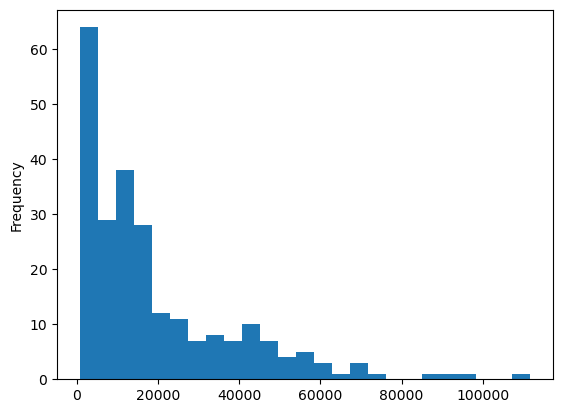

In [14]:
Histogram = Q8a['GDP_Per_Capita'].plot(kind='hist', bins = 25);

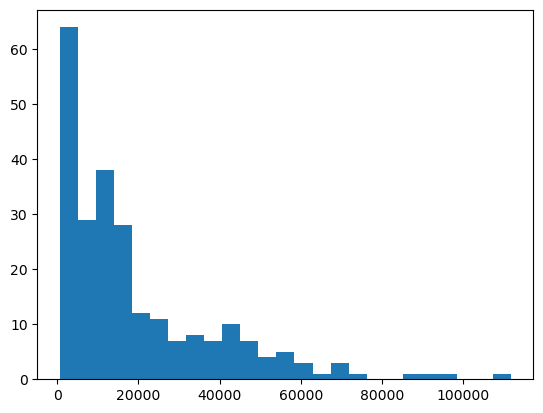

In [15]:
#second way to create the plot
Histogram2 = plt.hist(Q8a[['GDP_Per_Capita']], bins=25);

<Axes: ylabel='Density'>

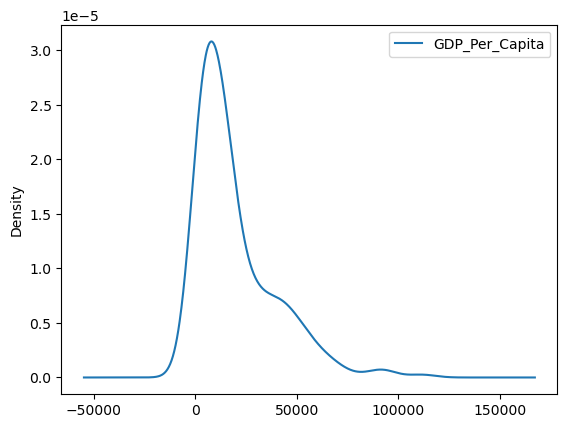

In [16]:
Q8a[['GDP_Per_Capita']].plot.density()

C:\Users\tayjy\AppData\Local\Temp\ipykernel_19408\4143431219.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Q8a['GDP_Per_Capita'], hist=False, kde=True);
C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


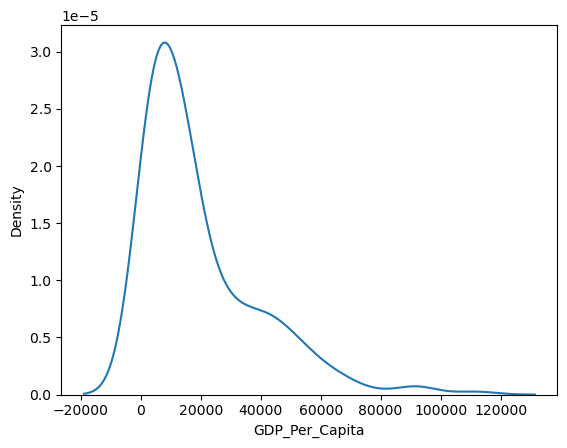

In [17]:
#alternate density plot
sns.distplot(Q8a['GDP_Per_Capita'], hist=False, kde=True);

In [18]:
(Q8a['GDP_Per_Capita'])

1        1968.341002
22       3455.023119
55       3957.933804
88      13278.369769
121     10844.770764
            ...     
7503    10450.622382
7536     5402.538773
7565    16204.169107
7598     3183.650773
7631     1990.319419
Name: GDP_Per_Capita, Length: 242, dtype: float64

In [19]:
(Q8a[['GDP_Per_Capita']])

,GDP_Per_Capita
1,1968.341002
22,3455.023119
55,3957.933804
88,13278.369769
121,10844.770764
...,...
7503,10450.622382
7536,5402.538773
7565,16204.169107
7598,3183.650773


<Axes: ylabel='GDP_Per_Capita'>

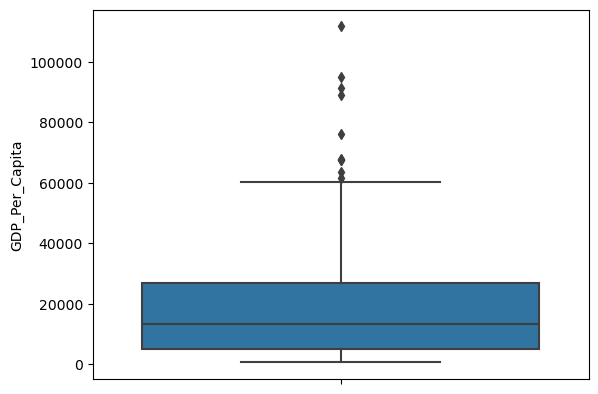

In [20]:
sns.boxplot( y=Q8a['GDP_Per_Capita'])

<Axes: ylabel='GDP_Per_Capita'>

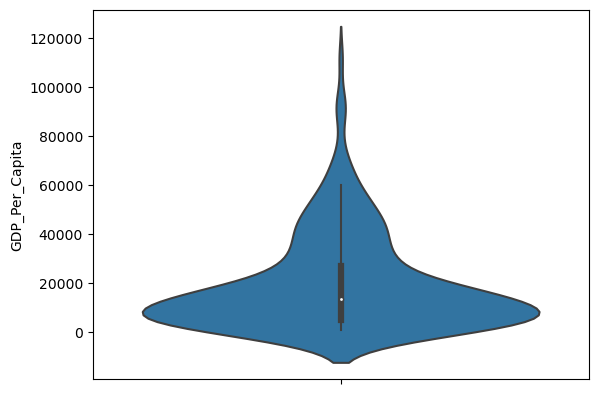

In [21]:
sns.violinplot(y=Q8a['GDP_Per_Capita'])

# Q9

In [22]:
Q8a['GDP_Per_Capita'].median()

13357.997573370474

# ANSWER =  13357.997573370474

# Q10

In [23]:
years = [1990,2000,2010,2020]

In [24]:
gdp_decades = gdp_df[gdp_df['Year'].isin(years)]

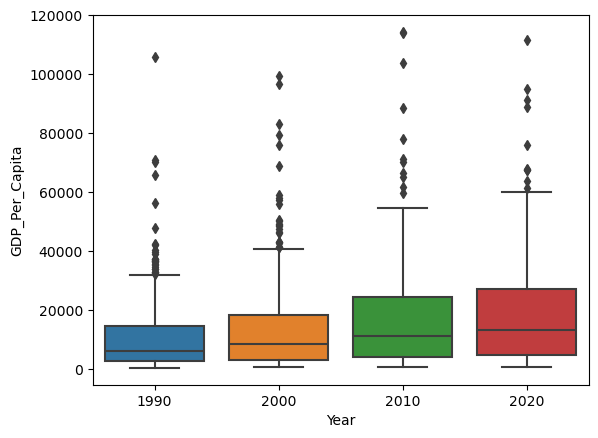

In [25]:
Boxplot = sns.boxplot(y=gdp_decades['GDP_Per_Capita'], x=gdp_decades['Year'])

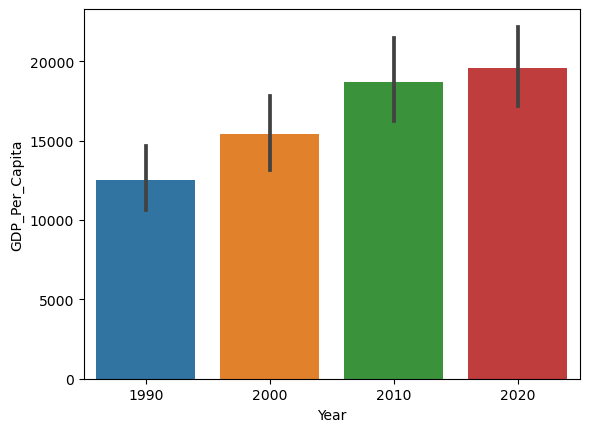

In [26]:
Barplot = sns.barplot(y=gdp_decades['GDP_Per_Capita'], x=gdp_decades['Year'])

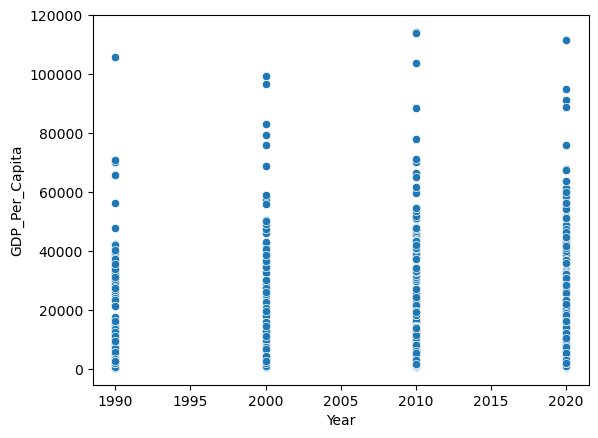

In [27]:
Scatterplot = sns.scatterplot(data=gdp_decades, y=gdp_decades['GDP_Per_Capita'], x=gdp_decades['Year'])

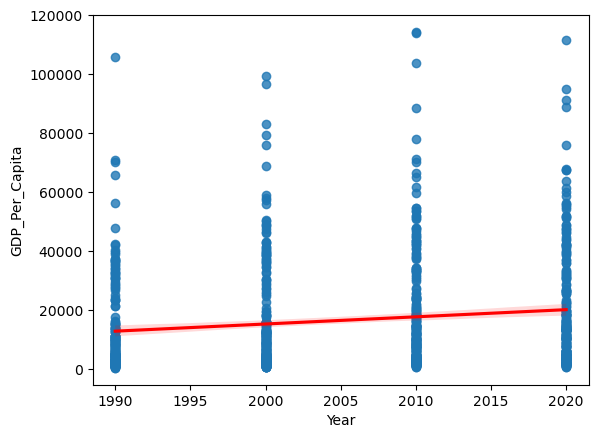

In [28]:
ScatterTrend = sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], line_kws={'color':'r'})

# ANSWER: The boxplot gives additional mettrics over the bar such as mean and quartiles, whereas the bar has a simpler communication. The scatter is a bit harder to see the concentration. For example one might interpret that data falling in 2010 has a higher gdp per capita than 2020. The addition of the regression helps with this. Depending on the audience and information priority, any of these could work.

# Q11

In [29]:
gdp_over_99999 = gdp_df[gdp_df['GDP_Per_Capita'] > 99999]

In [30]:
gdp_over_99999.iloc[-10:].sort_values(by=['Year'])

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
5756,Qatar,2010,103902.519310
5755,Qatar,2011,111879.747777
5754,Qatar,2012,110931.506472
5753,Qatar,2013,109625.629601
5752,Qatar,2014,106141.326189
6107,Singapore,2021,107741.118436
6106,Singapore,2022,108036.110993


# ANSWER: The UAE reached a gpd per capita of 105893.626059 in 1990 which is the earliest record of a gdp per capita over 99,999 for any country in the dataset.


# Q12

In [31]:
country_highest_gdp_2020 = Q8a.sort_values(by=['GDP_Per_Capita'], ascending = False)

In [32]:
Luxembourg_gdp = gdp_df[gdp_df['Country'] == 'Luxembourg']

In [33]:
Luxembourg_gdp = Luxembourg_gdp.sort_values(by=(['Year']))

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


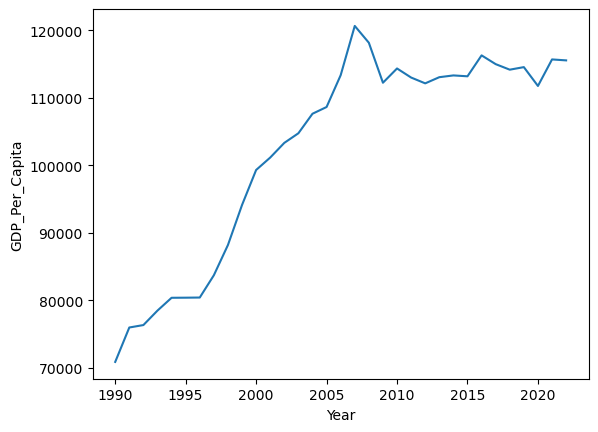

In [34]:
Lineplot_Luxembourg_gdp = sns.lineplot(data=Luxembourg_gdp, x='Year', y='GDP_Per_Capita')

# Q13

In [35]:
country_lowest_gdp_2020 = Q8a.sort_values(by=['GDP_Per_Capita'])

In [36]:
Burundi_gdp = gdp_df[gdp_df['Country'] == 'Burundi']

In [37]:
Burundi_gdp = Burundi_gdp.sort_values(by=(['Year']))

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


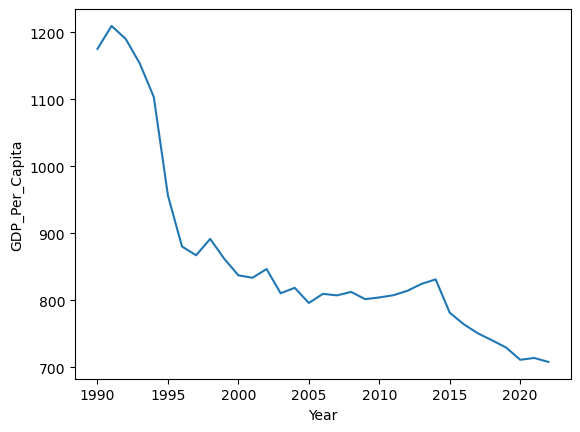

In [38]:
Lineplot_Burundi_gdp = sns.lineplot(data=Burundi_gdp, x='Year', y='GDP_Per_Capita')

# Q13 Bonus - circle back

# pivot table years_9020_pivot = years_9020.pivot_table(values="GDP_Per_Capita", index="Country", columns="Year")

# Q14

In [39]:
#data had footnotes which were also reading in. I limited the readin with nrows=
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495)

# Q15

In [40]:
#dropping in first line, renaming in second
internet_df = internet_df.drop('Value Footnotes', axis=1)
internet_df = internet_df.rename(columns={'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})

# Q16

In [41]:
Q16 = internet_df['Year'].value_counts().sort_index()

# ANSWER: Observations per year are static at 7 until 1989 when a sharp uptick is seen roughly between the years 1989 and 1999 reaching around 200 observations per year until 2014. 1990 is an outlier having 210 observations.

# Q17

In [42]:
non_zero__user_percent = internet_df[internet_df['Internet_Users_Pct'] > 0]

In [43]:
fist_non_zero__user_percent = non_zero__user_percent.sort_values(by=['Year'])

# ANSWER: 1990 is the first year to show a non-zero internet user percentage.

# Q18

In [44]:
percent_internet_users_2000 = internet_df.loc[internet_df['Year'] == 2000, ['Internet_Users_Pct']]

In [45]:
percent_internet_users_2014 = internet_df.loc[internet_df['Year'] == 2014, ['Internet_Users_Pct']]

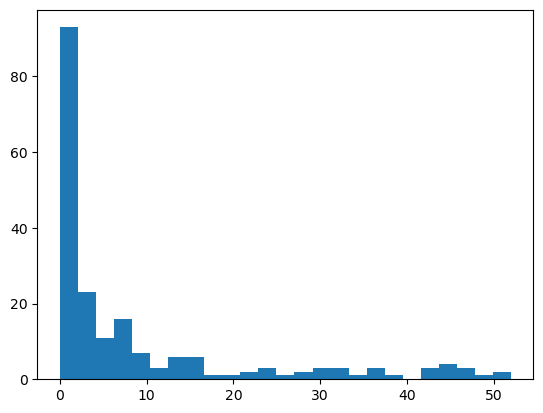

In [46]:
Histogram_percent_internet_users_2000 = plt.hist(percent_internet_users_2000[['Internet_Users_Pct']], bins=25);

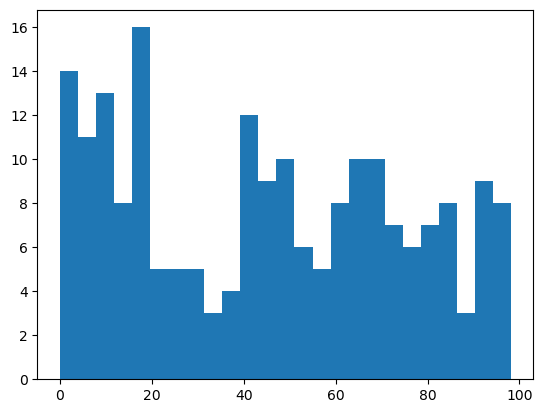

In [47]:
Histogram_percent_internet_users_2014 = plt.hist(percent_internet_users_2014[['Internet_Users_Pct']], bins=25);

# ANSWER: The distribution has clearly shifted away from zero percent internet users. The 2014 histogram shows a much more level distrobution than 2000

# Q19

In [48]:
data_from_2014 = internet_df[internet_df['Year'] == 2014]

In [49]:
users_pct_under_5_2014 = data_from_2014[data_from_2014['Internet_Users_Pct'] < 5.0]

In [50]:
users_pct_under_5_2014['Country'].nunique()

16

# ANSWER: 16 Countries had a internet user percentage below 5%

# Q20

In [51]:
gdp_and_internet_use = gdp_df.merge(internet_df, how='outer', on=['Year', 'Country'])

In [52]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
8731,Yemen,1999,NaN,0.056629
8732,Yemen,1998,NaN,0.023323
8733,Yemen,1997,NaN,0.015025
8734,Yemen,1996,NaN,0.000621


# Q21

In [53]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

In [54]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7,Afghanistan,2014,2144.449634,6.39
28,Africa Eastern and Southern,2014,3642.875373,NaN
61,Africa Western and Central,2014,4146.994622,NaN
94,Albania,2014,11586.817446,60.10
127,Algeria,2014,11561.259795,18.09
...,...,...,...,...
8589,T.F.Y.R. Macedonia,2014,NaN,68.06
8647,Turkey,2014,NaN,51.04
8670,Venezuela,2014,NaN,57.00
8694,Virgin Islands (U.S.),2014,NaN,50.07


In [55]:
gdp_and_internet_use_2014_clean = gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct'].notnull()]

In [56]:
gdp_and_internet_use_2014_clean

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7,Afghanistan,2014,2144.449634,6.39
94,Albania,2014,11586.817446,60.10
127,Algeria,2014,11561.259795,18.09
160,Angola,2014,8183.164577,21.26
193,Antigua and Barbuda,2014,18779.139077,64.00
...,...,...,...,...
8589,T.F.Y.R. Macedonia,2014,NaN,68.06
8647,Turkey,2014,NaN,51.04
8670,Venezuela,2014,NaN,57.00
8694,Virgin Islands (U.S.),2014,NaN,50.07


In [66]:
max_sorted = gdp_and_internet_use_2014_clean.sort_values('Internet_Users_Pct')

In [67]:
max_sorted.tail(3)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5212,Norway,2014,62838.515727,96.30
687,Bermuda,2014,77361.104881,96.80
2993,Iceland,2014,50450.741612,98.16


C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

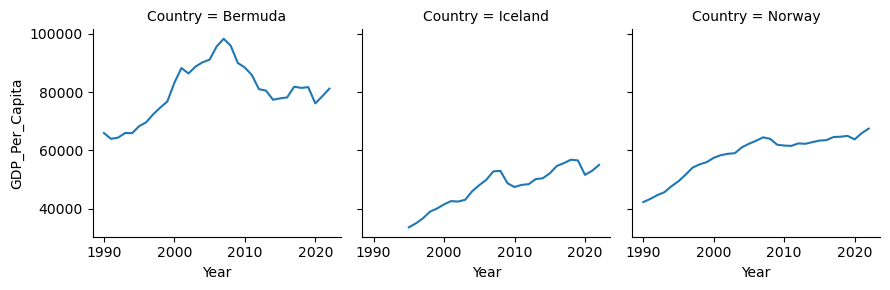

In [68]:
top3 = ['Iceland', 'Bermuda', 'Norway']
gdp_top3 = gdp_df[gdp_df['Country'].isin(top3)]

graph = sns.FacetGrid(gdp_top3, col='Country')
graph.map(sns.lineplot, 'Year', 'GDP_Per_Capita')
plt.show()

# ANSWER: Norway, Bermuda, and Iceland had the top internet users in 2014. These three countries GDP per Capita has an upward trend over time. 2008 finacial crash looks like it crushed a bit of tourism.

# Q22

# ANSWER: Completed in Q21

# Q23

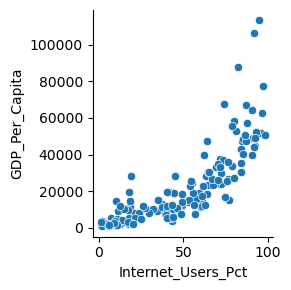

In [69]:
graph = sns.FacetGrid(gdp_and_internet_use_2014)
graph.map(sns.scatterplot, 'Internet_Users_Pct', 'GDP_Per_Capita')
plt.show()

In [76]:
outlier_1 = gdp_and_internet_use_2014[gdp_and_internet_use_2014['GDP_Per_Capita'] >20000]

In [78]:
outlier_1[outlier_1['Internet_Users_Pct'] <25]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2009,Equatorial Guinea,2014,28106.198389,18.86


# ANSWER: Looks like Equatorial Guinea is in the midst of easing poverty levels in 2014, but their internet usage is clearly lagging behind.